In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'


In [2]:
df = pd.read_csv("wages.csv")

In [90]:
df_male_races = df[df.facet.str.contains('demographics: (white|black|hispanic) male')]
df_female_races = df[df.facet.str.contains('demographics: (white|black|hispanic) female')]

df_male_races['facet'] = df_male_races['facet'].replace('demographics: white male','White')
df_male_races['facet'] = df_male_races['facet'].replace('demographics: black male','Black')
df_male_races['facet'] = df_male_races['facet'].replace('demographics: hispanic male','Hispanic')

df_female_races['facet'] = df_female_races['facet'].replace('demographics: white female','White')
df_female_races['facet'] = df_female_races['facet'].replace('demographics: black female','Black')
df_female_races['facet'] = df_female_races['facet'].replace('demographics: hispanic female','Hispanic')

C:\Users\timon\AppData\Local\Temp\ipykernel_7616\4029621559.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_male_races = df[df.facet.str.contains('demographics: (white|black|hispanic) male')]
C:\Users\timon\AppData\Local\Temp\ipykernel_7616\4029621559.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_female_races = df[df.facet.str.contains('demographics: (white|black|hispanic) female')]


In [99]:
color_palette = ["#E58606", "#5D69B1", "#A5AA99"]
caption = 'Source: Union Membership and Coverage Database\nGraphics: Thomas Shaw'

Text(1.025, 0, 'Source: Union Membership and Coverage Database\nGraphics: Thomas Shaw')

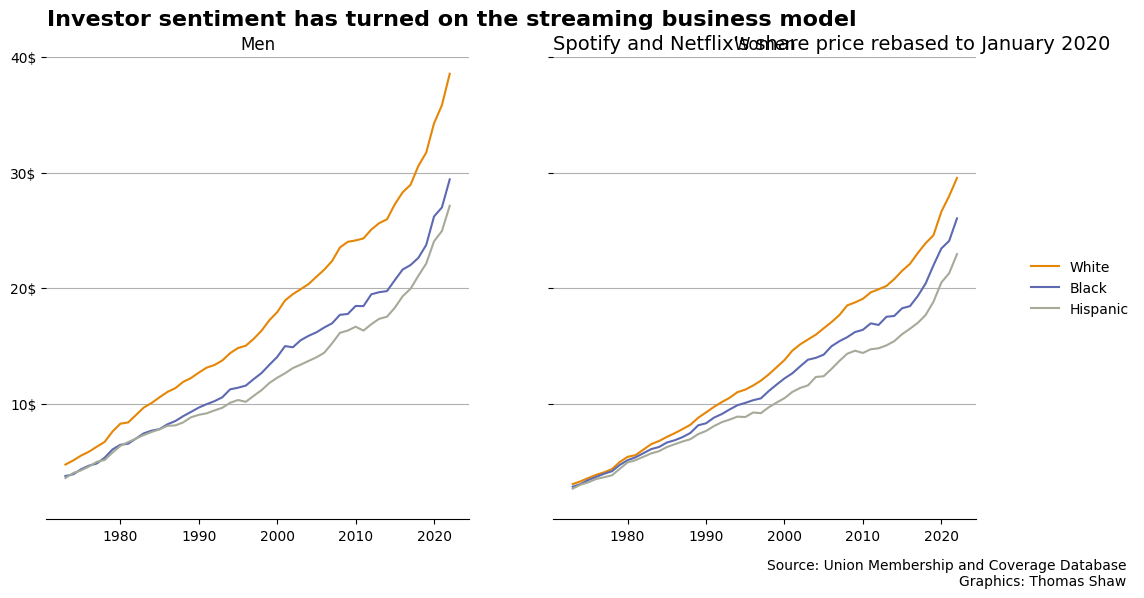

In [109]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

plt.title(
    "Spotify and Netflix's share price rebased to January 2020",
    fontsize=14,
    pad=10,
    loc="left",
)
plt.suptitle(
    "Investor sentiment has turned on the streaming business model",
    fontsize=16,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",
)

sns.lineplot(x=df_male_races.year,
             y=df_male_races.wage,
             data=df_male_races,
             ax=ax1,
             palette=color_palette,
             hue="facet",
             legend=False)

sns.lineplot(x=df_female_races.year,
             y=df_female_races.wage, 
             data=df_female_races,
             ax=ax2,
             palette=color_palette,
             hue="facet")

yticks = [10, 20, 30, 40]
ylabels = map(lambda x: str(x) + '$', yticks)  

ax1.set_title('Men');
ax2.set_title('Women');

ax1.set_ylim([0, 40])  
ax1.set_yticks(ticks=yticks, labels=ylabels)
ax1.set_ylabel('')
ax1.set_xlabel('')
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticks(ticks=yticks, labels=ylabels)
ax2.set_ylabel('')
ax2.set_xlabel('')

ax1.spines.top.set_visible(False)
ax1.spines.left.set_visible(False)
ax1.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.right.set_visible(False)

ax1.grid(axis='y')
ax2.grid(axis='y')

handles, labels = ax1.get_legend_handles_labels()
l = ax2.legend(handles=handles, labels=['white', 'black', 'hispanic'], bbox_to_anchor=(1.1,0.5), loc='center left', frameon=False)

f.text(1.025, 0, caption, ha='right')
